In [1]:
from pipeline import Pipeline
import numpy as np

audio_path = 'eleven/11.mp3'
transcription_path = 'eleven/transcript.json'
output_transcription_path = 'eleven/output.rttm'

pipeline = Pipeline(
    n_speakers=9,
    audio_path=audio_path,
    transcription_path=transcription_path,
    output_transcription_path=output_transcription_path,
    supervision_coeffs=list(np.arange(0, 1.01, 0.01))
)
pipeline.run()
print(pipeline.metrics)

C:\Users\loico\Desktop\podcast-diarizer\venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[1] Initializing pipeline for eleven/11.mp3.
[2] Converting MP3 (eleven/11.mp3) to WAV...
[3] Converting JSON (eleven/transcript.json) to RTTM...
[4] Segmenting with cuda.
[5] Created 920 unlabeled segments
[6] Created 234 labeled segments
[7] Embedding with cuda.
[8] Generated 920 unlabeled embeddings.
[9] Generated 234 labeled embeddings.
[10] Using first 0% (0) embeddings.


  File "C:\Users\loico\Desktop\podcast-diarizer\venv\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\loico\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\loico\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\loico\AppData\Local\Programs\Python\Python312\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,
                       ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^


[11] Generated RTTM (eleven/output0.0.rttm).
[12] Using first 1% (2) embeddings.
[13] Generated RTTM (eleven/output0.01.rttm).
[14] Using first 2% (4) embeddings.
[15] Generated RTTM (eleven/output0.02.rttm).
[16] Using first 3% (7) embeddings.
[17] Generated RTTM (eleven/output0.03.rttm).
[18] Using first 4% (9) embeddings.
[19] Generated RTTM (eleven/output0.04.rttm).
[20] Using first 5% (11) embeddings.
[21] Generated RTTM (eleven/output0.05.rttm).
[22] Using first 6% (14) embeddings.
[23] Generated RTTM (eleven/output0.06.rttm).
[24] Using first 7% (16) embeddings.
[25] Generated RTTM (eleven/output0.07.rttm).
[26] Using first 8% (18) embeddings.
[27] Generated RTTM (eleven/output0.08.rttm).
[28] Using first 9% (21) embeddings.
[29] Generated RTTM (eleven/output0.09.rttm).
[30] Using first 10% (23) embeddings.
[31] Generated RTTM (eleven/output0.1.rttm).
[32] Using first 11% (25) embeddings.
[33] Generated RTTM (eleven/output0.11.rttm).
[34] Using first 12% (28) embeddings.
[35] Ge

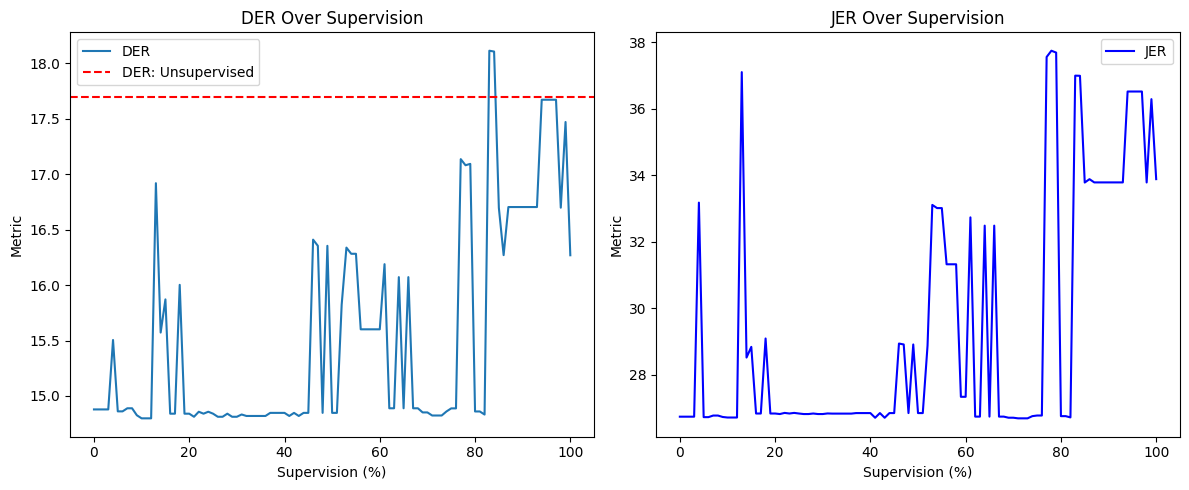

Best Transcript: 10 with DER of 14.798402127529226
Best Transcript: 71 with JER of 26.68536846498432


In [15]:
import matplotlib.pyplot as plt

x = ([x * 100 for x in pipeline.metrics[0]], [x * 100 for x in pipeline.metrics[1]])

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot DER on the first subplot
ax1.plot(x[0], label='DER')
ax1.axhline(y=17.70, color='red', linestyle='--', label='DER: Unsupervised')
ax1.set_xlabel('Supervision (%)')
ax1.set_ylabel('Metric')
ax1.set_title('DER Over Supervision')
ax1.legend()

# Plot JER on the second subplot
ax2.plot(x[1], label='JER', color='blue')
ax2.set_xlabel('Supervision (%)')
ax2.set_ylabel('Metric')
ax2.set_title('JER Over Supervision')
ax2.legend()

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

best_transcript_der = x[0].index(min(x[0]))
best_transcript_jer = x[1].index(min(x[1]))
print(f"Best Transcript: {best_transcript_der} with DER of {x[0][best_transcript_der]}")
print(f"Best Transcript: {best_transcript_jer} with JER of {x[1][best_transcript_jer]}")